# Q1

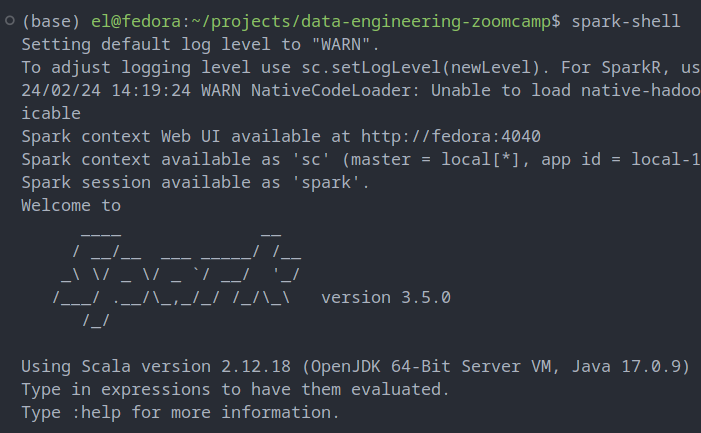

In [1]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .appName("CSV to Parquet") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/24 14:30:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Read CSV data into DataFrame
csv_file_path = "data/fhv_tripdata_2019-10.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

In [5]:
# Repartition DataFrame into 6 partitions
df_repartitioned = df.repartition(6)

# Save DataFrame to Parquet format
parquet_output_path = "data/output"
df_repartitioned.write \
    .mode("overwrite") \
    .parquet(parquet_output_path)

# Q2

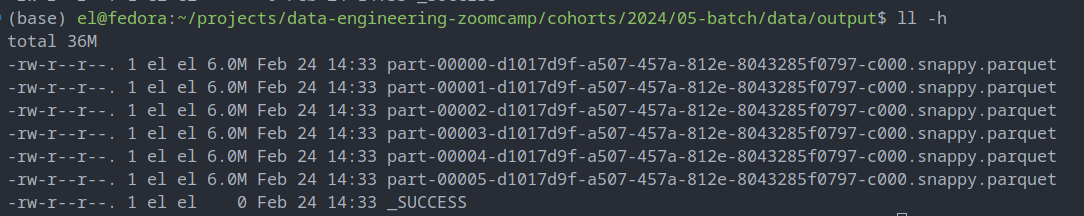

# Q3

In [16]:
df.schema

StructType([StructField('dispatching_base_num', StringType(), True), StructField('pickup_datetime', TimestampType(), True), StructField('dropOff_datetime', TimestampType(), True), StructField('PUlocationID', IntegerType(), True), StructField('DOlocationID', IntegerType(), True), StructField('SR_Flag', StringType(), True), StructField('Affiliated_base_number', StringType(), True)])

In [19]:
from pyspark.sql.functions import col

In [20]:
count_rows = df.filter(col("pickup_datetime").cast("date") == '2019-10-15').count()

In [21]:
count_rows

62610

# Q4

In [ ]:
StructType([StructField('dispatching_base_num', StringType(), True), 
            StructField('pickup_datetime', TimestampType(), True), StructField('dropOff_datetime', TimestampType(), True), StructField('PUlocationID', IntegerType(), True), StructField('DOlocationID', IntegerType(), True), StructField('SR_Flag', StringType(), True), 
            StructField('Affiliated_base_number', StringType(), True)])

In [22]:
from pyspark.sql.functions import col, unix_timestamp, hour, expr

In [23]:
df = df.withColumn("pickup_timestamp", unix_timestamp(col("pickup_datetime")).cast("timestamp")) \
    .withColumn("dropoff_timestamp", unix_timestamp(col("dropoff_datetime")).cast("timestamp"))
    
df = df.withColumn("duration", (col("dropoff_timestamp").cast("long") - col("pickup_timestamp").cast("long")) / 3600)
max_duration = df.agg({"duration": "max"}).collect()[0][0]
max_duration

631152.5

# Q5

4040

# Q6

In [24]:
# Read CSV data into DataFrame
csv_file_path = "data/taxi_zone_lookup.csv"
df_zone = spark.read.csv(csv_file_path, header=True, inferSchema=True)

In [30]:
df.head(5)

[Row(dispatching_base_num='B00009', pickup_datetime=datetime.datetime(2019, 10, 1, 0, 23), dropOff_datetime=datetime.datetime(2019, 10, 1, 0, 35), PUlocationID=264, DOlocationID=264, SR_Flag=None, Affiliated_base_number='B00009', pickup_timestamp=datetime.datetime(2019, 10, 1, 0, 23), dropoff_timestamp=datetime.datetime(2019, 10, 1, 0, 35), duration=0.2),
 Row(dispatching_base_num='B00013', pickup_datetime=datetime.datetime(2019, 10, 1, 0, 11, 29), dropOff_datetime=datetime.datetime(2019, 10, 1, 0, 13, 22), PUlocationID=264, DOlocationID=264, SR_Flag=None, Affiliated_base_number='B00013', pickup_timestamp=datetime.datetime(2019, 10, 1, 0, 11, 29), dropoff_timestamp=datetime.datetime(2019, 10, 1, 0, 13, 22), duration=0.03138888888888889),
 Row(dispatching_base_num='B00014', pickup_datetime=datetime.datetime(2019, 10, 1, 0, 11, 43), dropOff_datetime=datetime.datetime(2019, 10, 1, 0, 37, 20), PUlocationID=264, DOlocationID=264, SR_Flag=None, Affiliated_base_number='B00014', pickup_timesta

In [29]:
df_zone.head(5)

[Row(LocationID=1, Borough='EWR', Zone='Newark Airport', service_zone='EWR'),
 Row(LocationID=2, Borough='Queens', Zone='Jamaica Bay', service_zone='Boro Zone'),
 Row(LocationID=3, Borough='Bronx', Zone='Allerton/Pelham Gardens', service_zone='Boro Zone'),
 Row(LocationID=4, Borough='Manhattan', Zone='Alphabet City', service_zone='Yellow Zone'),
 Row(LocationID=5, Borough='Staten Island', Zone='Arden Heights', service_zone='Boro Zone')]

In [33]:
joined_df = df.join(df_zone, df.PUlocationID == df_zone.LocationID, "left")

result_df = joined_df.groupBy("Zone").count()
result_df = result_df.orderBy("count")

result_df.show()

+--------------------+-----+
|                Zone|count|
+--------------------+-----+
|         Jamaica Bay|    1|
|Governor's Island...|    2|
| Green-Wood Cemetery|    5|
|       Broad Channel|    8|
|     Highbridge Park|   14|
|        Battery Park|   15|
|Saint Michaels Ce...|   23|
|Breezy Point/Fort...|   25|
|Marine Park/Floyd...|   26|
|        Astoria Park|   29|
|    Inwood Hill Park|   39|
|       Willets Point|   47|
|Forest Park/Highl...|   53|
|  Brooklyn Navy Yard|   57|
|        Crotona Park|   62|
|        Country Club|   77|
|     Freshkills Park|   89|
|       Prospect Park|   98|
|     Columbia Street|  105|
|  South Williamsburg|  110|
+--------------------+-----+
only showing top 20 rows



24/02/24 15:01:50 ERROR SparkContext: Exception getting heap histogram from executor driver
java.io.IOException: Cannot run program "/usr/lib/jvm/java-17-openjdk-17.0.9.0.9-3.fc39.x86_64/bin/jmap": error=2, No such file or directory
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1143)
	at java.base/java.lang.ProcessBuilder.start(ProcessBuilder.java:1073)
	at org.apache.spark.util.Utils$.getHeapHistogram(Utils.scala:2147)
	at org.apache.spark.SparkContext.getExecutorHeapHistogram(SparkContext.scala:753)
	at org.apache.spark.ui.exec.ExecutorHeapHistogramPage.render(ExecutorHeapHistogramPage.scala:41)
	at org.apache.spark.ui.WebUI.$anonfun$attachPage$1(WebUI.scala:90)
	at org.apache.spark.ui.JettyUtils$$anon$1.doGet(JettyUtils.scala:81)
	at javax.servlet.http.HttpServlet.service(HttpServlet.java:503)
	at javax.servlet.http.HttpServlet.service(HttpServlet.java:590)
	at org.sparkproject.jetty.servlet.ServletHolder.handle(ServletHolder.java:799)
	at org.sparkproject.jetty.s

In [ ]:
# Stop SparkSession
spark.stop()